<a href="https://colab.research.google.com/github/ssusanti8/PCVK_Matrikulisasi/blob/main/jobsheet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

#Praktikum 1

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


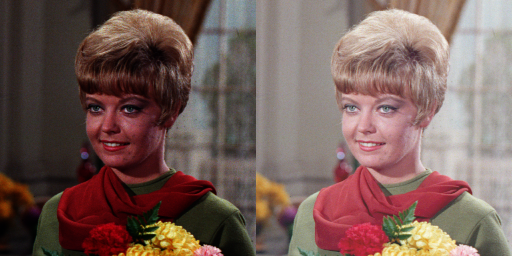

In [4]:
original= cv.imread('/content/drive/MyDrive/Images/female.tiff')
gamma_corrected = np.zeros(original.shape, original.dtype)

print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_corrected[y,x,c] = np.clip(255 * pow(original[y,x,c]/255, (1/gamma)),0,255);

final_frame = cv.hconcat((original, gamma_corrected))
cv2_imshow(final_frame)

#PRAKTIKUM 2

Image Depth pada citra 
--------------------------
Input bit depth value : 3


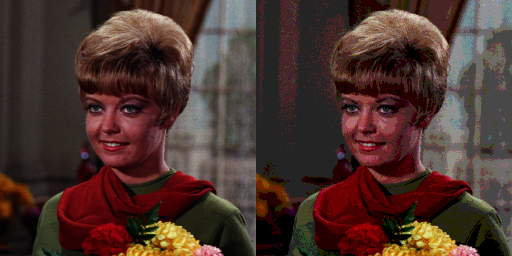

In [5]:
image = cv.imread('/content/drive/MyDrive/Images/female.tiff')
depth_image = np.zeros(image.shape, image.dtype)

print('Image Depth pada citra ')
print('--------------------------')
try:
  bd = float(input('Input bit depth value : '))
except ValueError:
  print('Error, not a number')
# bit=pow(2,bd)
bit=2**bd
level = 255/(bit-1)
for y in range(image.shape[0]):
  for x in range(image.shape[1]):
    for c in range(image.shape[2]):
      depth_image[y,x,c] = np.clip(round(image[y,x,c]/level)*level,0,255);

final_frame = cv.hconcat((image, depth_image))
cv2_imshow(final_frame)

#PRAKTIKUM 3

Nilai PSNR Average 5 adalah 28.31834390284684 (dB)


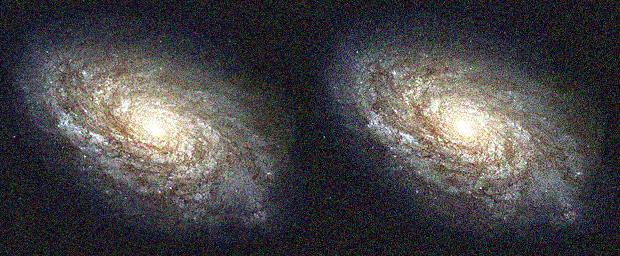

Nilai PSNR Average 30 adalah 30.11195663513678 (dB)


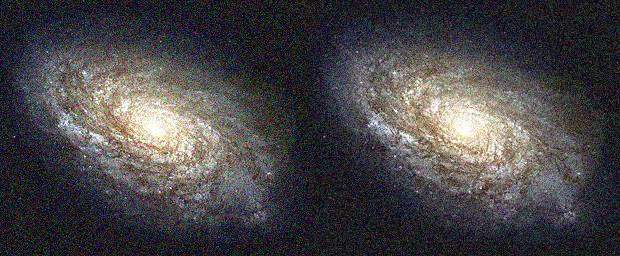

Nilai PSNR Average 60 adalah 30.30135670028843 (dB)


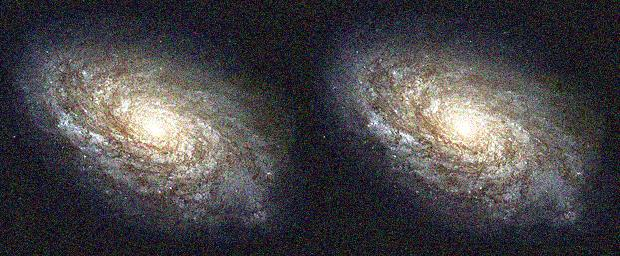

Nilai PSNR Average 80 adalah 31.29056947163862 (dB)


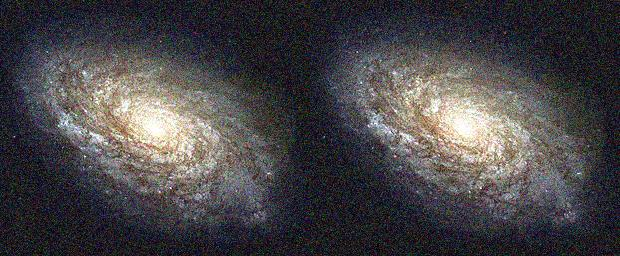

Nilai PSNR Average 100 adalah 30.276159182055373 (dB)


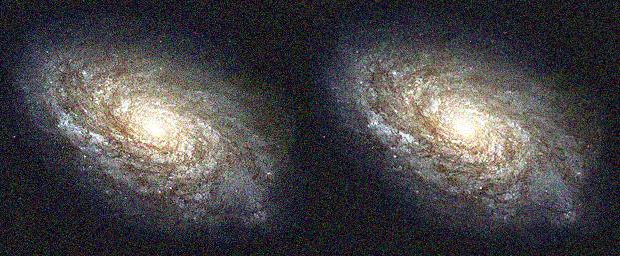

In [6]:
import glob
from math import log10, sqrt
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Images/noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)
def PSNR(original, compressed):
  first_image = cv_img[0]
  for x in range(1, compressed):
    if(x==0):
      continue
  first_image = first_image - cv_img[x]

  mse = np.mean((first_image) ** compressed)
  if(mse == 0): 
    return 100
  max_pixel = 255.0
  psnr = 20 * log10(max_pixel / sqrt(mse))
  return psnr
#average 5
ori_img = cv_img[0]
noise_img = 5

noise = PSNR(ori_img, noise_img)
print('Nilai PSNR Average 5 adalah',noise,'(dB)')

final_frame = cv.hconcat((ori_img, cv_img[4]))
cv2_imshow(final_frame)

#average 30
ori_img = cv_img[0]
noise_img = 30

noise = PSNR(ori_img, noise_img)
print('Nilai PSNR Average 30 adalah',noise,'(dB)')

final_frame = cv.hconcat((ori_img, cv_img[29]))
cv2_imshow(final_frame)
#average 60
ori_img = cv_img[0]
noise_img = 60

noise = PSNR(ori_img, noise_img)
print('Nilai PSNR Average 60 adalah',noise,'(dB)')

final_frame = cv.hconcat((ori_img, cv_img[59]))
cv2_imshow(final_frame)
#average 80
ori_img = cv_img[0]
noise_img = 80

noise = PSNR(ori_img, noise_img)
print('Nilai PSNR Average 80 adalah',noise,'(dB)')

final_frame = cv.hconcat((ori_img, cv_img[79]))
cv2_imshow(final_frame)
#average 100
ori_img = cv_img[0]
noise_img = 100

noise = PSNR(ori_img, noise_img)
print('Nilai PSNR Average 100 adalah',noise,'(dB)')

final_frame = cv.hconcat((ori_img, cv_img[99]))
cv2_imshow(final_frame)

#PRAKTIKUM 4


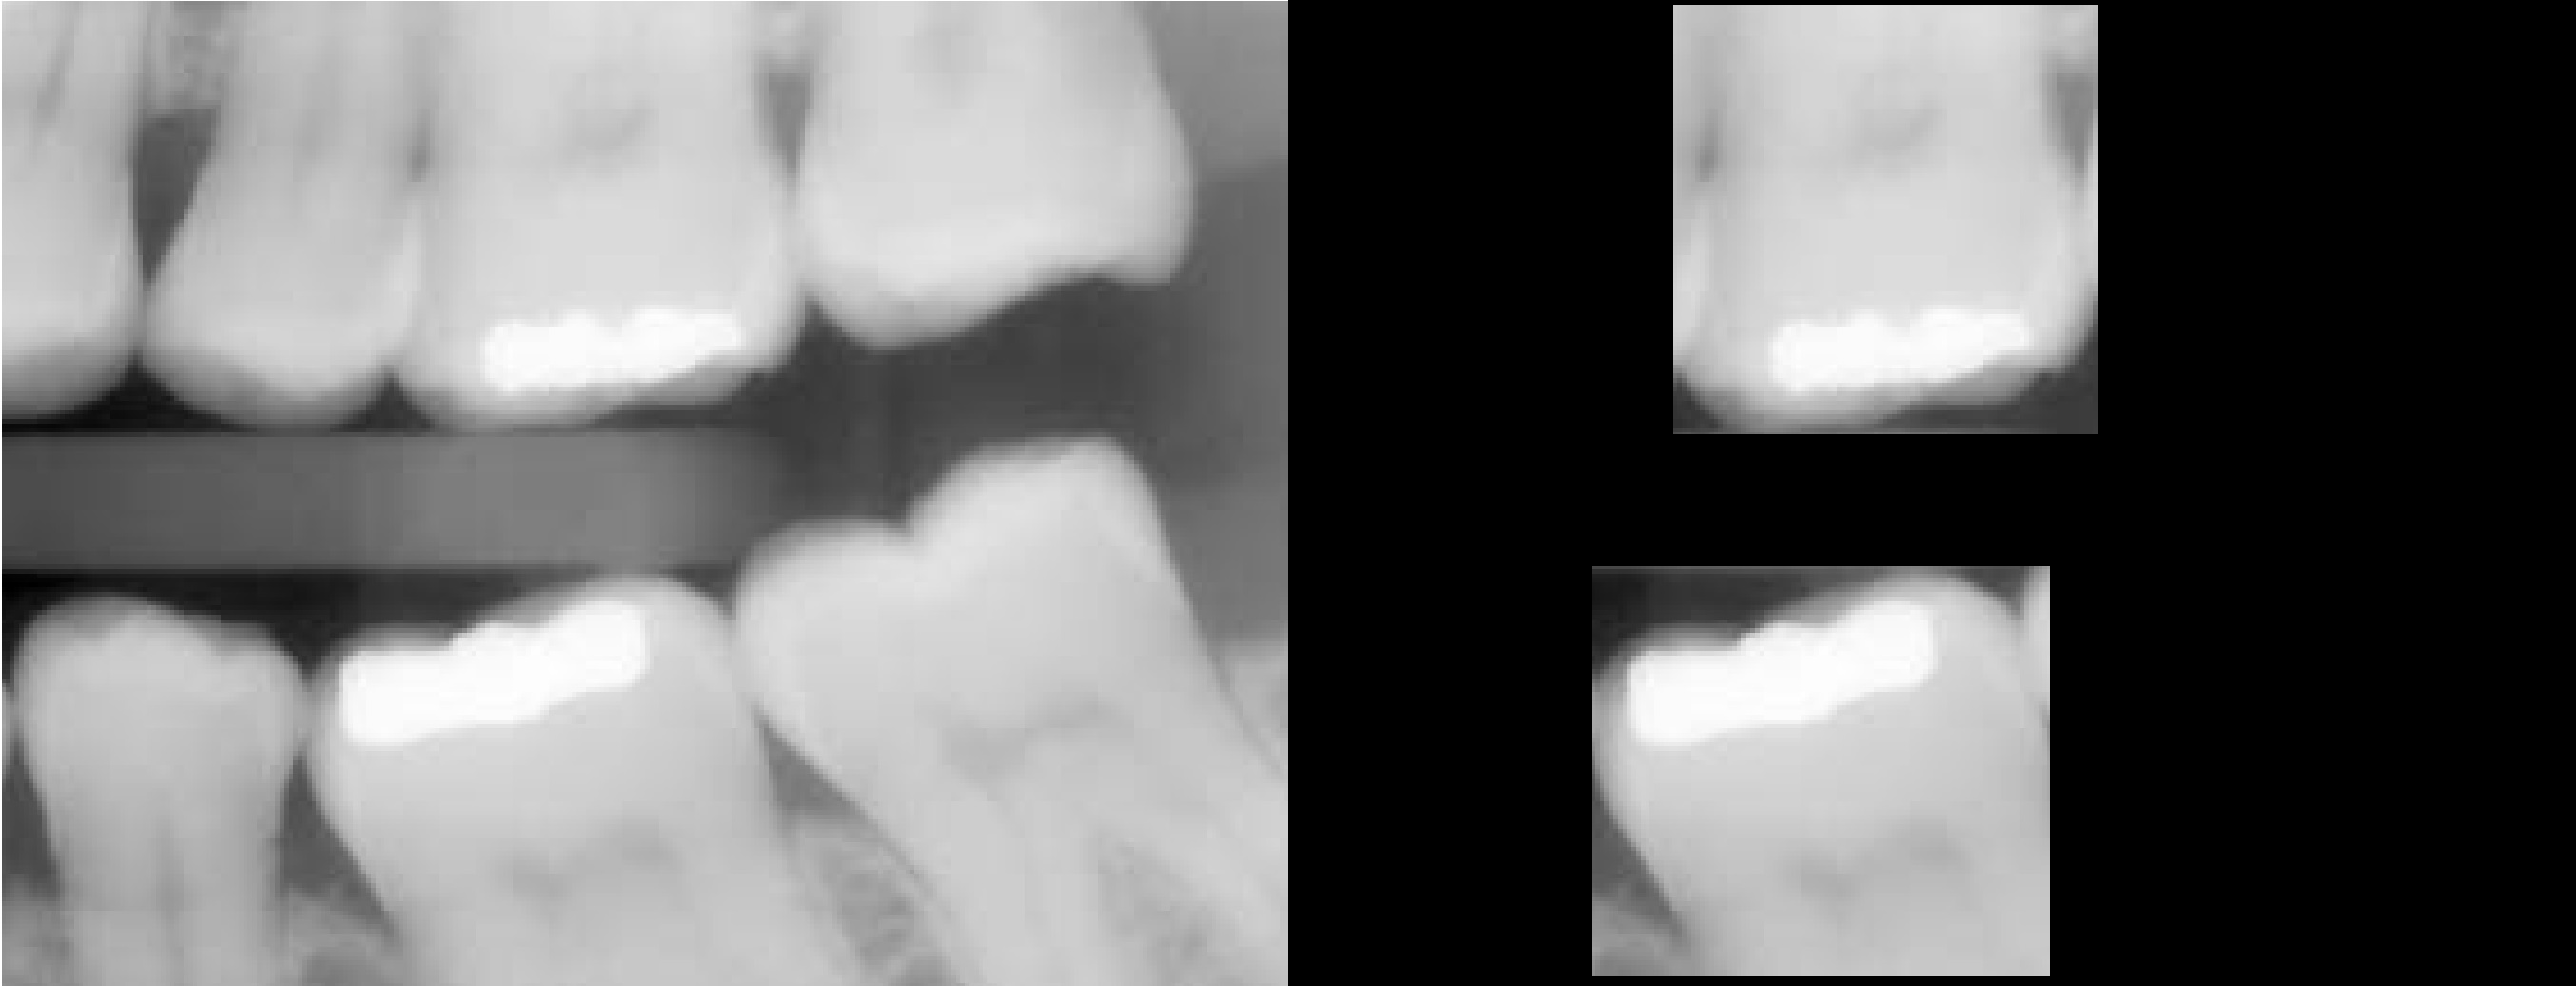

In [8]:
img = cv.imread('/content/drive/MyDrive/Images/teeth.jpg')
img_mask = np.zeros(img.shape, dtype=np.uint8)
img_mask = cv.rectangle(img_mask,pt1=(320,595),pt2=(800,1025),color=(255,255,255),thickness=-1)

result = img & img_mask
img_mask1 = cv.rectangle(img_mask,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)
result = img & img_mask1

final_frame = cv.hconcat((img, result))
cv2_imshow(final_frame)

#Praktikum 5

Operator OR

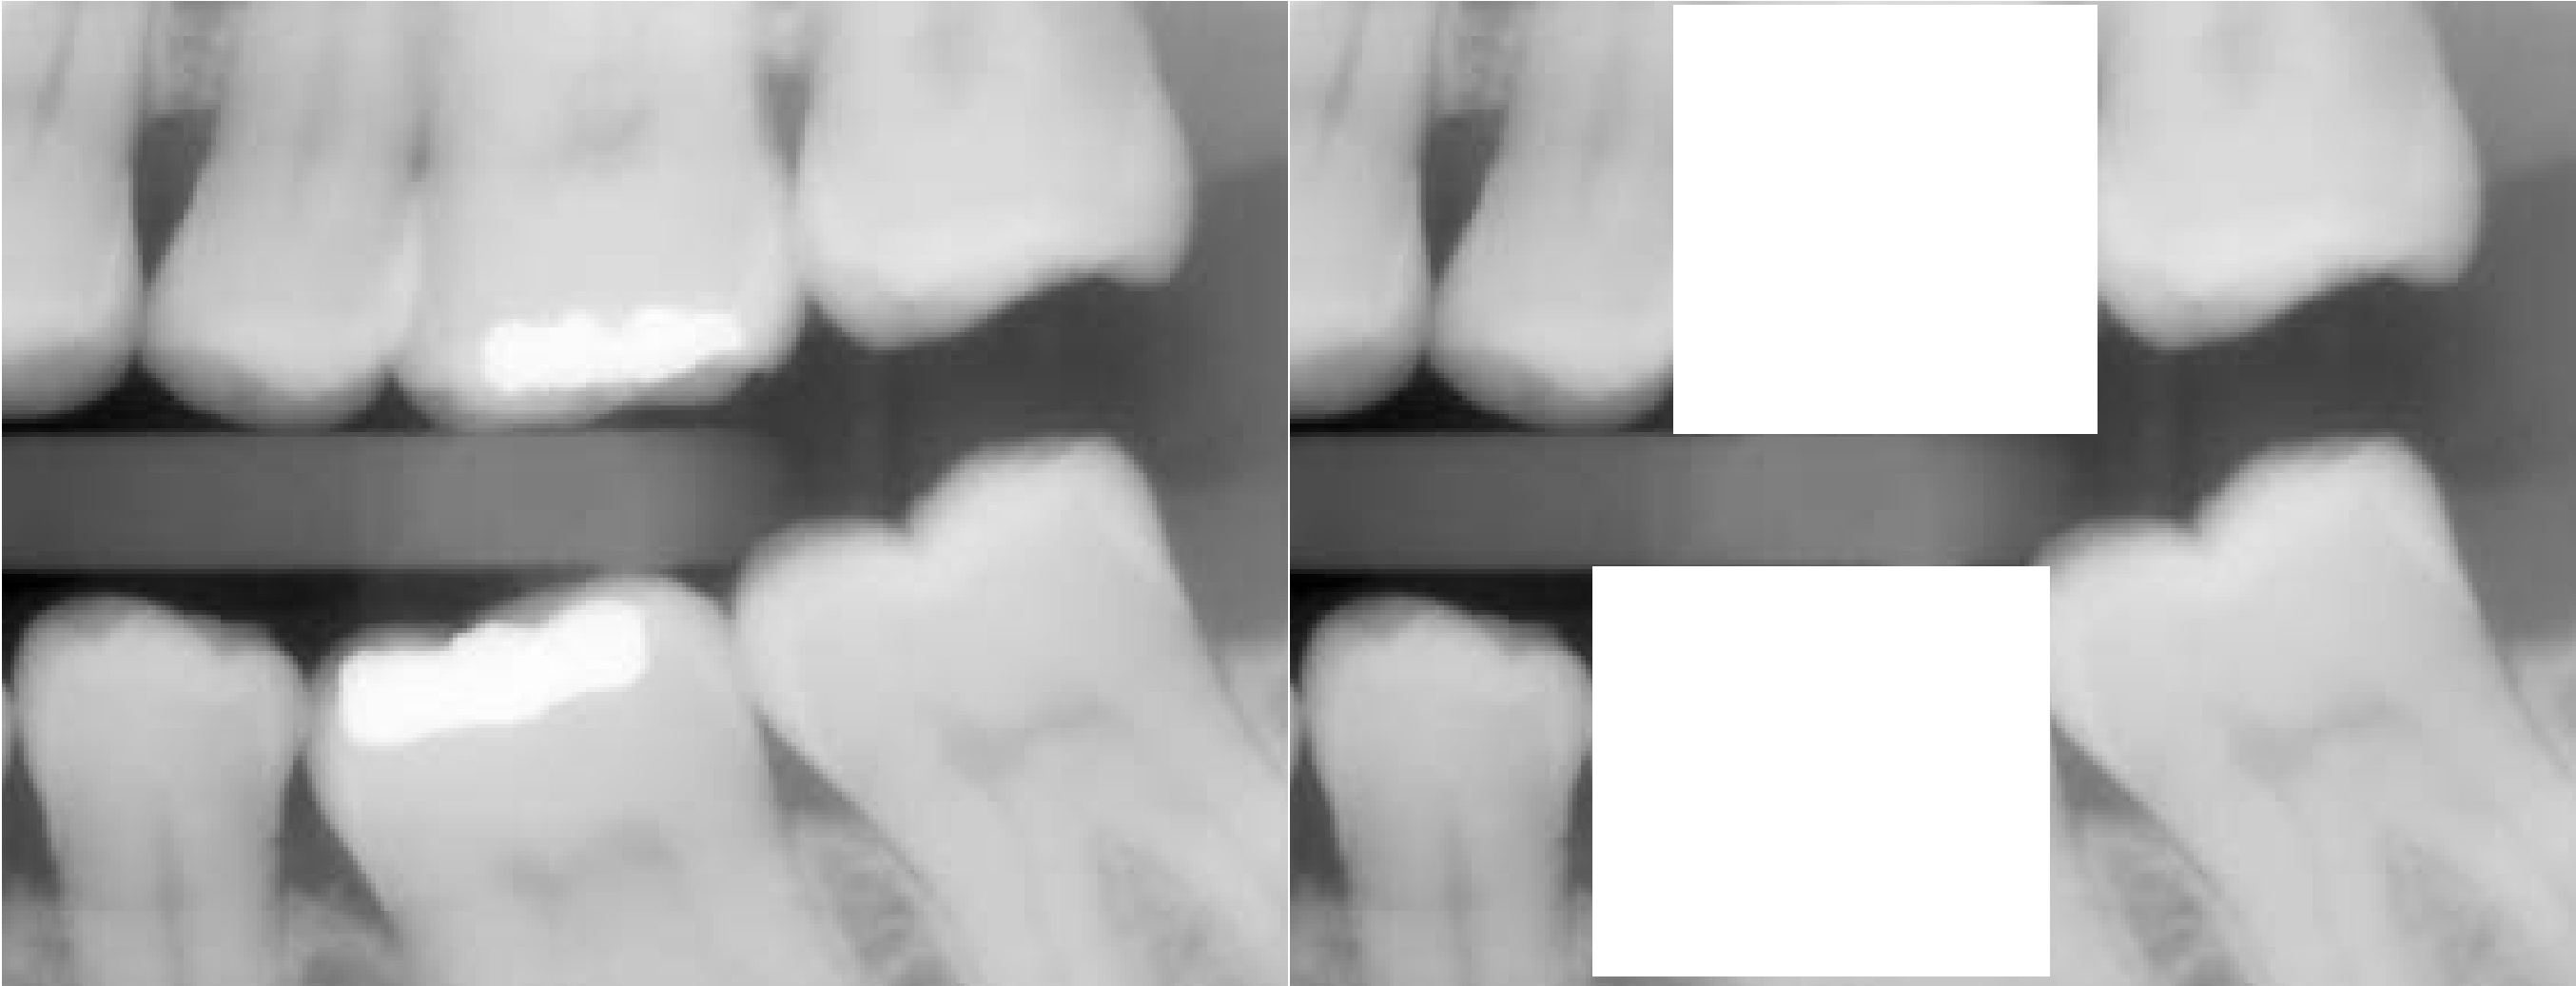

In [9]:
img_or = cv.imread('/content/drive/MyDrive/Images/teeth.jpg')
mask_or = np.zeros(img_or.shape, dtype=np.uint8)
mask_or = cv.rectangle(mask_or,pt1=(320,595),pt2=(800,1025),color=(255,255,255),thickness=-1)
result = img_or | mask_or

mask_or1 = cv.rectangle(mask_or,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)
result_or1 = img_or | mask_or1

final_frame = cv.hconcat((img_or, result_or1))
cv2_imshow(final_frame)

Operator NOT

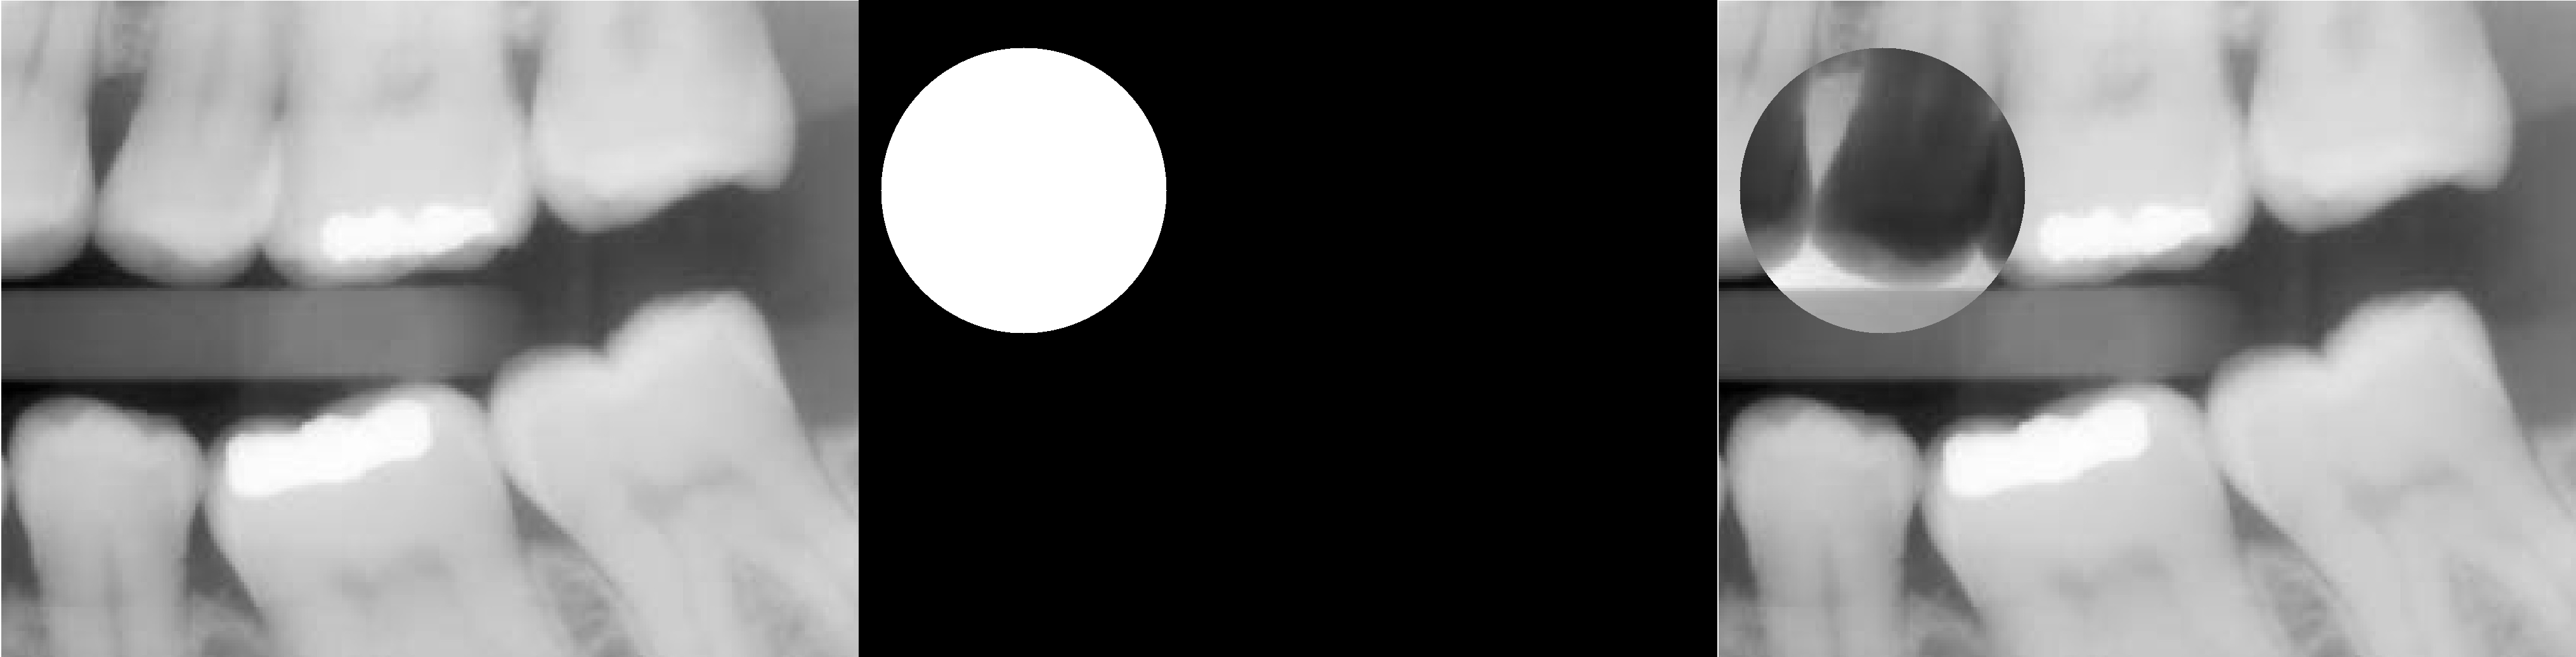

In [10]:
img_not = cv.imread('/content/drive/MyDrive/Images/teeth.jpg')
mask_not = np.zeros(img_not.shape, dtype=np.uint8)
mask_not = cv.circle(mask_not, (260, 300), 225, (255,255,255), -1)

result_not = img_not ^ mask_not

final_frame = cv.hconcat((img_not, mask_not, result_not))
cv2_imshow(final_frame)

Operator NAND

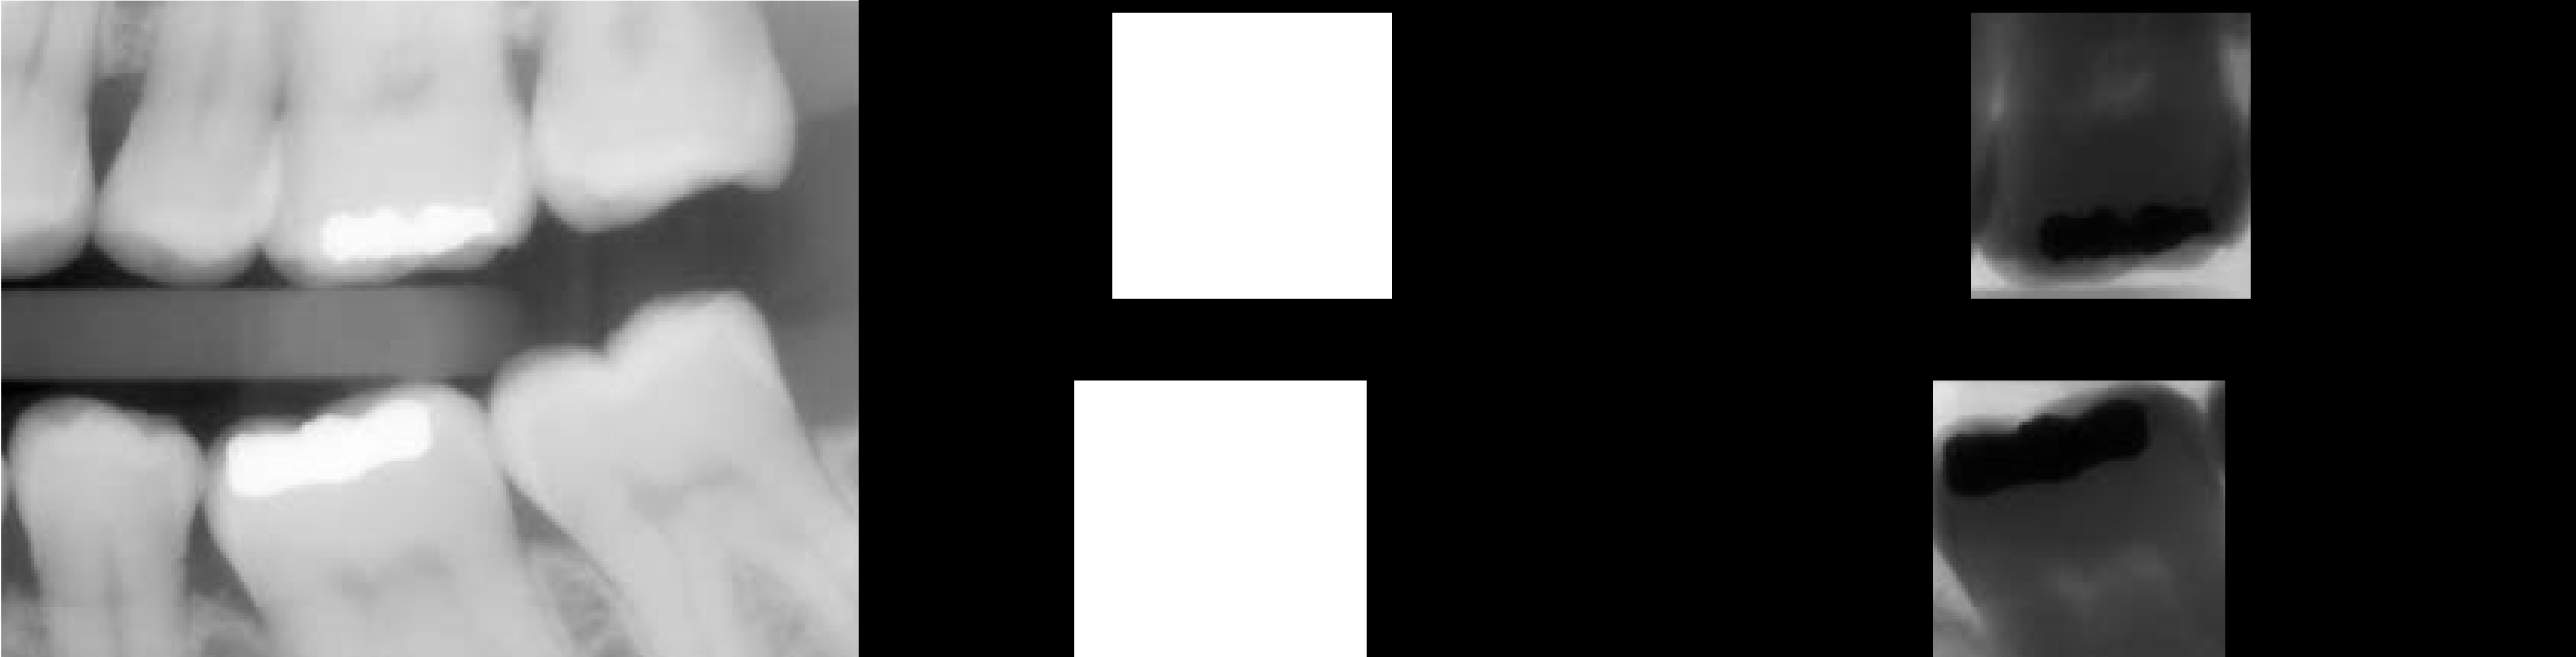

In [11]:
img_nand = cv.imread('/content/drive/MyDrive/Images/teeth.jpg')
mask_nand = np.zeros(img_nand.shape, dtype=np.uint8)
mask_nand = cv.rectangle(mask_nand,pt1=(400,20),pt2=(840,470),color=(255,255,255), thickness=-1)
mask_nand = cv.rectangle(mask_nand,pt1=(340,600),pt2=(800,1200),color=(255,255,255), thickness=-1)

result_nand = ~img_nand & mask_nand

final_frame = cv.hconcat((img_nand, mask_nand, result_nand))
cv2_imshow(final_frame)

Operator XOR

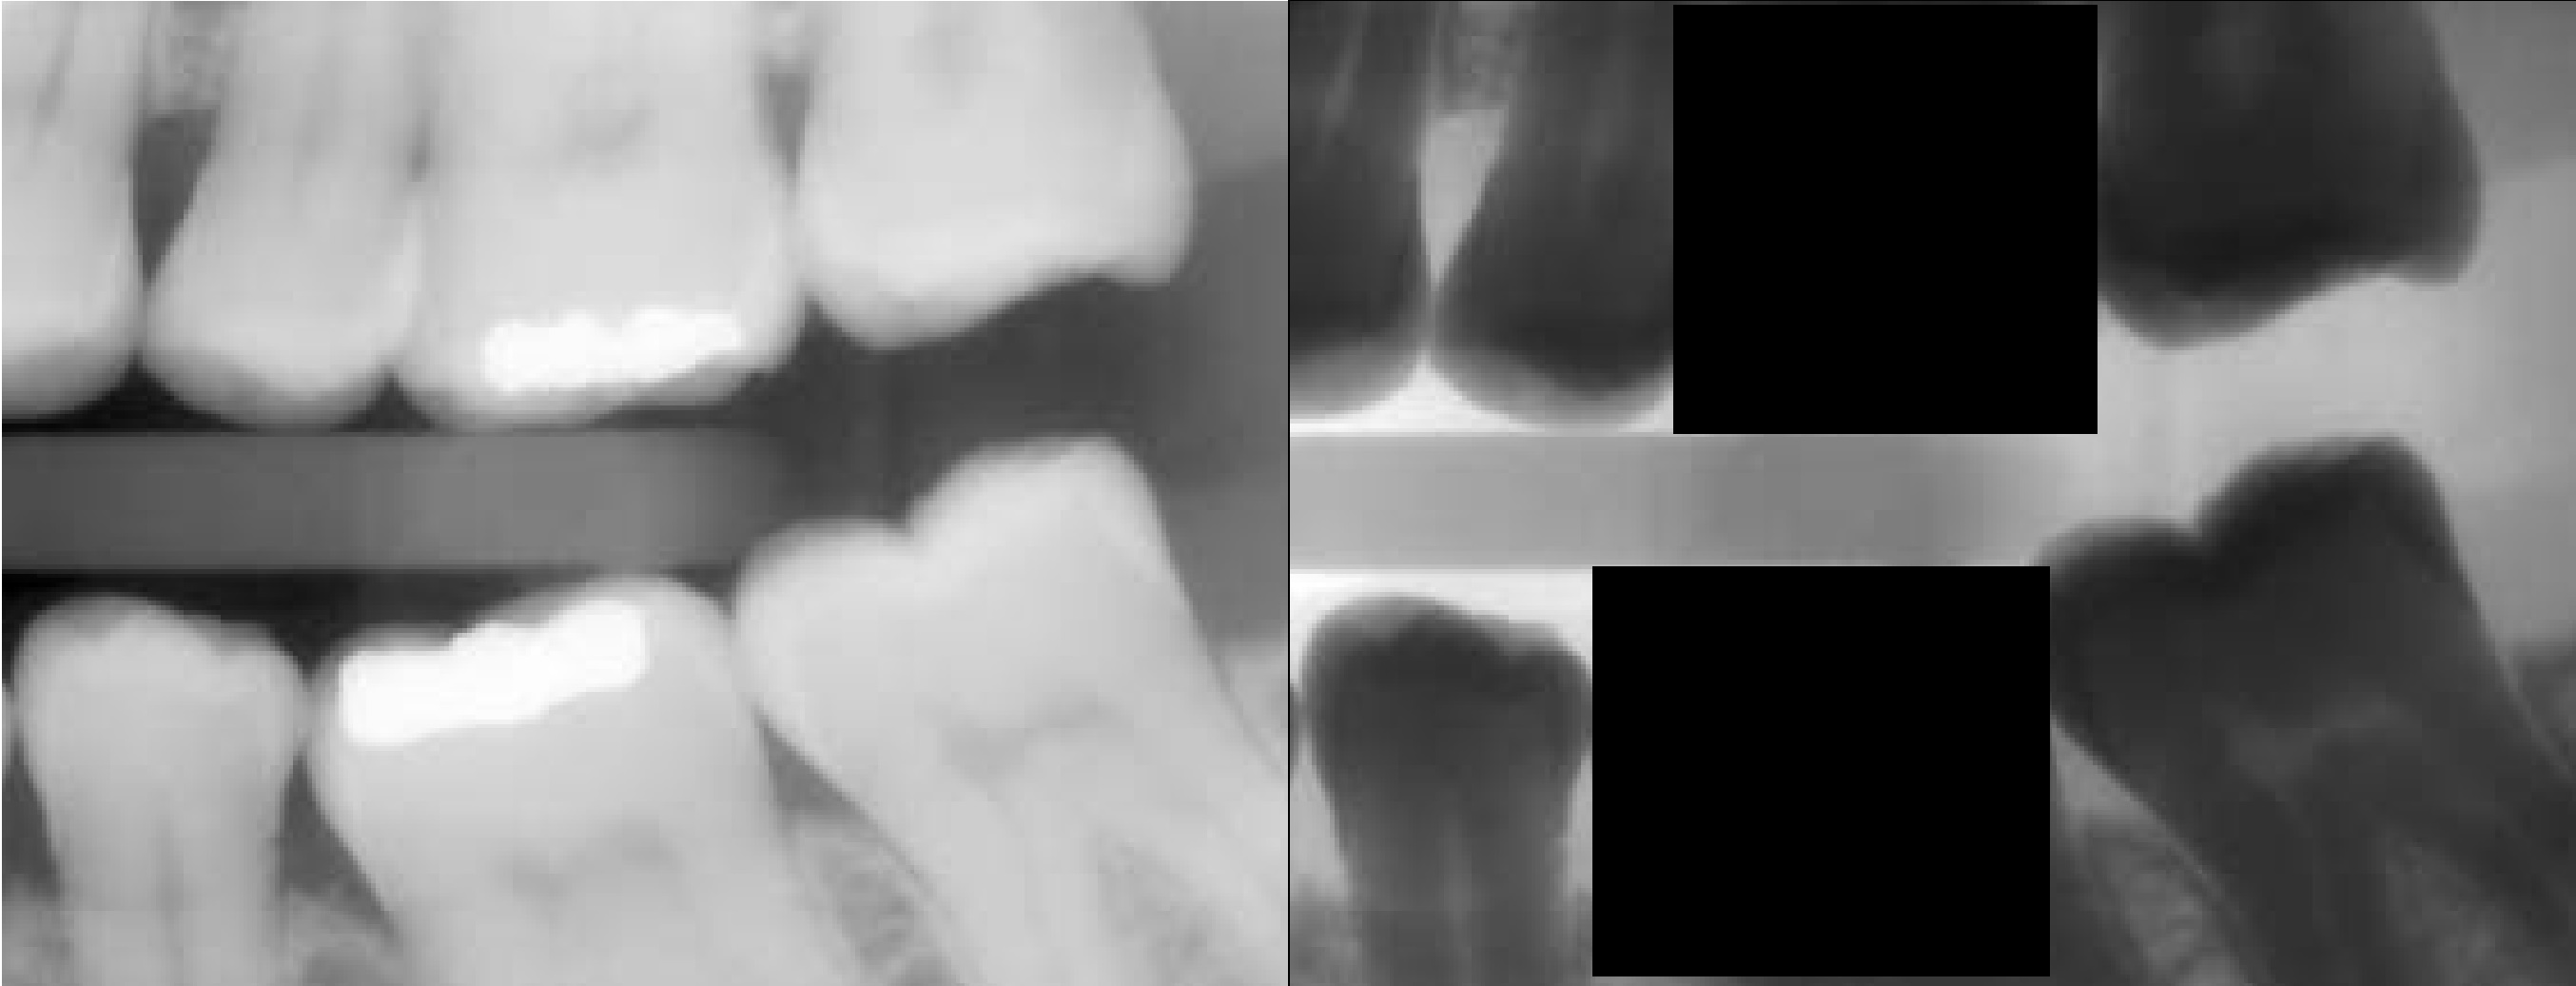

In [12]:
img_xor = cv.imread('/content/drive/MyDrive/Images/teeth.jpg')
mask_xor = np.zeros(img_xor.shape, dtype=np.uint8)
mask_xor = cv.rectangle(mask_xor,pt1=(320,595),pt2=(800,1025),color=(255,255,255),thickness=-1)

result = ~img_xor & ~mask_xor

mask_xor1 = cv.rectangle(mask_xor,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result_xor1= ~img_xor & ~mask_xor1

final_frame = cv.hconcat((img_xor, result_xor1))
cv2_imshow(final_frame)